In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import citypy
from citipy import citipy

# Import the requests library.
import requests

# Import the API key-- ensure config file is in the same location as this one
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create a set of random latitude and longitude combinations and make them pairs with the zip function
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [10]:
# Add the latitudes and longitudes to a list.
#unpacking the lat_lngs zip object allows us to create a set of random latitudes and longitudes once
coordinates = list(lat_lngs)

In [11]:
# Create a list for holding the cities based on coordinates in lat_lngs
cities = []
# Identify the nearest city for each latitude and longitude combination.
# iterate through the coordinates and retrieve the nearest city using the latitude and longitude pair
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
#initialized the counters at 1 because we want the 
##first iteration of the logging for each recorded response and the set to start at 1
record_count = 1
set_count = 1

# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         #sleep timer will pause the program for 60 seconds--needed because we can only get 60 calls per minute
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    #check if the remainder of the index divided by 50 is equal to 0 
    ##and if the index is greater than or equal to 50-- if ture, set and record count +1
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    ##remove the blank spaces in the city name and concatenate the city name w/ +
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    ##print statement that tells us the record count and set count, and the city that is being processed
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count before the next city is processed 
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lagoa
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | estelle
Processing Record 5 of Set 1 | north platte
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | celestun
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | tuatapere
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | marcona
City not found. Skipping...
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | baghmara
Processing Record 17 of Set 1 | lakatoro
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | souillac
Processing Record 22 of

City not found. Skipping...
Processing Record 37 of Set 4 | high level
Processing Record 38 of Set 4 | warqla
City not found. Skipping...
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | luvianos
Processing Record 41 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 42 of Set 4 | yuanping
Processing Record 43 of Set 4 | bokspits
City not found. Skipping...
Processing Record 44 of Set 4 | pingliang
Processing Record 45 of Set 4 | grindavik
Processing Record 46 of Set 4 | penzance
Processing Record 47 of Set 4 | erzin
Processing Record 48 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 49 of Set 4 | pangnirtung
Processing Record 50 of Set 4 | cabo san lucas
Processing Record 1 of Set 5 | svetlogorsk
Processing Record 2 of Set 5 | susangerd
Processing Record 3 of Set 5 | volkhov
Processing Record 4 of Set 5 | altay
Processing Record 5 of Set 5 | chokurdakh
Processing Record 6 of Set 5 | ostrovnoy
Processing Record 7 of Set 5

Processing Record 24 of Set 8 | camacha
Processing Record 25 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 26 of Set 8 | mbengwi
Processing Record 27 of Set 8 | maragogi
Processing Record 28 of Set 8 | wenling
Processing Record 29 of Set 8 | laguna
Processing Record 30 of Set 8 | sistranda
Processing Record 31 of Set 8 | sapucaia
Processing Record 32 of Set 8 | abu kamal
Processing Record 33 of Set 8 | mezen
Processing Record 34 of Set 8 | campiglia marittima
Processing Record 35 of Set 8 | cherskiy
Processing Record 36 of Set 8 | khandbari
Processing Record 37 of Set 8 | bayji
Processing Record 38 of Set 8 | verkhoyansk
Processing Record 39 of Set 8 | zhigansk
Processing Record 40 of Set 8 | barillas
Processing Record 41 of Set 8 | sibolga
Processing Record 42 of Set 8 | trairi
Processing Record 43 of Set 8 | bagotville
Processing Record 44 of Set 8 | imeni poliny osipenko
Processing Record 45 of Set 8 | college
Processing Record 46 of Set 8 | port macquarie
Process

Processing Record 14 of Set 12 | marovoay
Processing Record 15 of Set 12 | gazojak
Processing Record 16 of Set 12 | saint-denis
Processing Record 17 of Set 12 | sorsk
Processing Record 18 of Set 12 | moose factory
Processing Record 19 of Set 12 | campbellton
Processing Record 20 of Set 12 | sobolevo
Processing Record 21 of Set 12 | rosarito
Processing Record 22 of Set 12 | buala
Processing Record 23 of Set 12 | smirnykh
Processing Record 24 of Set 12 | maihar
Processing Record 25 of Set 12 | nur
Processing Record 26 of Set 12 | kamaishi
Processing Record 27 of Set 12 | luwuk
Processing Record 28 of Set 12 | aksu
Processing Record 29 of Set 12 | sandwick
Processing Record 30 of Set 12 | tuburan
Processing Record 31 of Set 12 | mariental
Processing Record 32 of Set 12 | williamsburg
Processing Record 33 of Set 12 | hobyo
Processing Record 34 of Set 12 | whitehorse
Processing Record 35 of Set 12 | urumqi
Processing Record 36 of Set 12 | na wa
Processing Record 37 of Set 12 | homer
-------

In [18]:
# tally the number of cities in the city_data array of dictionaries
len(city_data)

542

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lagoa,39.0500,-27.9833,61.14,62,89,9.40,PT,2021-11-28 00:58:49
1,Tasiilaq,65.6145,-37.6368,23.31,90,100,10.71,GL,2021-11-28 00:58:11
2,East London,-33.0153,27.9116,63.46,90,6,4.92,ZA,2021-11-28 00:58:50
3,Estelle,29.8458,-90.1067,53.60,63,100,3.78,US,2021-11-28 00:58:50
4,North Platte,41.1239,-100.7654,46.17,45,100,8.28,US,2021-11-28 00:58:51
5,Albany,42.6001,-73.9662,25.41,66,5,8.95,US,2021-11-28 00:57:29
6,Ushuaia,-54.8000,-68.3000,51.46,43,20,10.36,AR,2021-11-28 00:57:39
7,Celestun,20.8667,-90.4000,74.88,75,97,9.33,MX,2021-11-28 00:58:51
8,Tuatapere,-46.1333,167.6833,62.38,44,0,5.77,NZ,2021-11-28 00:58:52
9,Port Lincoln,-34.7333,135.8667,64.89,64,0,9.35,AU,2021-11-28 00:56:29


In [22]:
column_order= ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2021-11-28 00:58:49,39.0500,-27.9833,61.14,62,89,9.40
1,Tasiilaq,GL,2021-11-28 00:58:11,65.6145,-37.6368,23.31,90,100,10.71
2,East London,ZA,2021-11-28 00:58:50,-33.0153,27.9116,63.46,90,6,4.92
3,Estelle,US,2021-11-28 00:58:50,29.8458,-90.1067,53.60,63,100,3.78
4,North Platte,US,2021-11-28 00:58:51,41.1239,-100.7654,46.17,45,100,8.28
5,Albany,US,2021-11-28 00:57:29,42.6001,-73.9662,25.41,66,5,8.95
6,Ushuaia,AR,2021-11-28 00:57:39,-54.8000,-68.3000,51.46,43,20,10.36
7,Celestun,MX,2021-11-28 00:58:51,20.8667,-90.4000,74.88,75,97,9.33
8,Tuatapere,NZ,2021-11-28 00:58:52,-46.1333,167.6833,62.38,44,0,5.77
9,Port Lincoln,AU,2021-11-28 00:56:29,-34.7333,135.8667,64.89,64,0,9.35


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

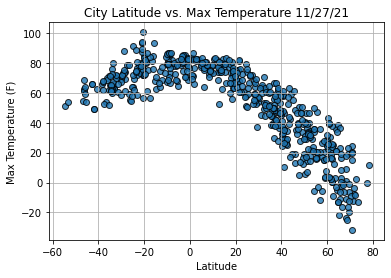

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

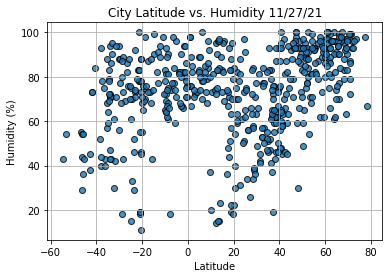

In [30]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

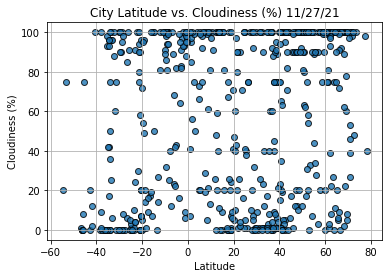

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

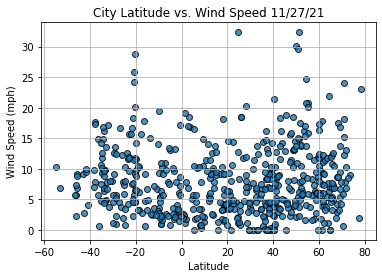

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [61]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    print(f"The r-value is: {r_value:.3f}")

In [62]:
# get all the information at index 13 of the city_data_df DataFrame
index13 = city_data_df.loc[13]
index13

City                     Baghmara
Country                        IN
Date          2021-11-28 00:58:54
Lat                        23.795
Lng                       86.2085
Max Temp                    60.66
Humidity                       61
Cloudiness                     71
Wind Speed                   4.61
Name: 13, dtype: object

In [63]:
#get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
537     True
538     True
539     True
540     True
541     True
Name: Lat, Length: 542, dtype: bool

In [64]:
# get a DataFrame where the latitudes are greater than or equal to 0
northern_hemi_df= city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2021-11-28 00:58:49,39.0500,-27.9833,61.14,62,89,9.40
1,Tasiilaq,GL,2021-11-28 00:58:11,65.6145,-37.6368,23.31,90,100,10.71
3,Estelle,US,2021-11-28 00:58:50,29.8458,-90.1067,53.60,63,100,3.78
4,North Platte,US,2021-11-28 00:58:51,41.1239,-100.7654,46.17,45,100,8.28
5,Albany,US,2021-11-28 00:57:29,42.6001,-73.9662,25.41,66,5,8.95


In [65]:
#get the cities for the Southern Hemisphere by filtering the city_data_df DataFrame for latitudes less than 0
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,East London,ZA,2021-11-28 00:58:50,-33.0153,27.9116,63.46,90,6,4.92
6,Ushuaia,AR,2021-11-28 00:57:39,-54.8000,-68.3000,51.46,43,20,10.36
8,Tuatapere,NZ,2021-11-28 00:58:52,-46.1333,167.6833,62.38,44,0,5.77
9,Port Lincoln,AU,2021-11-28 00:56:29,-34.7333,135.8667,64.89,64,0,9.35
10,Faanui,PF,2021-11-28 00:58:53,-16.4833,-151.7500,81.37,73,17,17.85


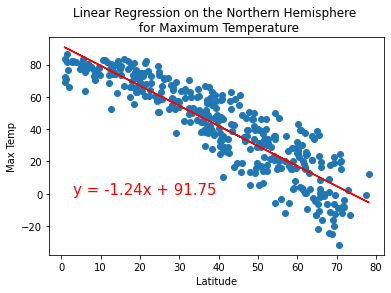

The r-value is: -0.895


In [66]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(3,0))

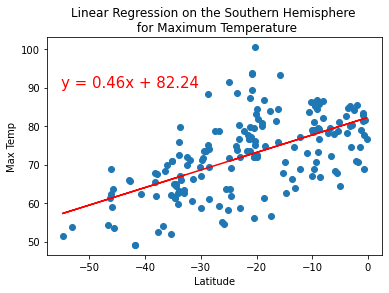

The r-value is: 0.587


In [67]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,90))



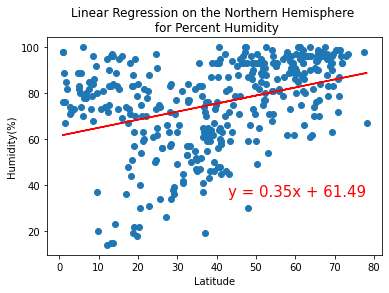

The r-value is: 0.358


In [74]:
# Linear regression on the Northern Hemisphere for percent humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Percent Humidity', 'Humidity(%)',(43,35))

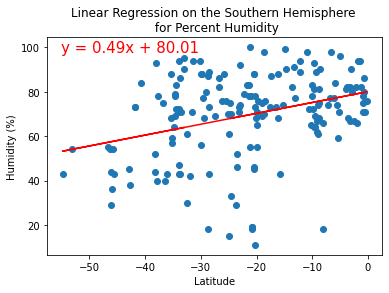

The r-value is: 0.328


In [77]:
# Linear regression on the Southern Hemisphere for Percent Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Percent Humidity', 'Humidity (%)',(-55,98))



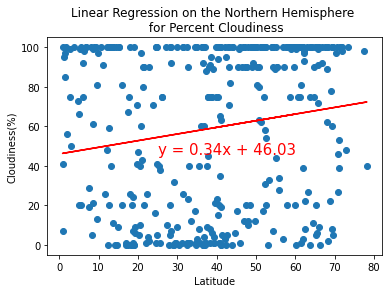

The r-value is: 0.165


In [84]:
# Linear regression on the Northern Hemisphere for percent cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Percent Cloudiness', 'Cloudiness(%)',(25,46))


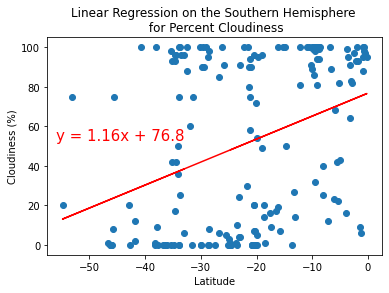

The r-value is: 0.358


In [89]:
# Linear regression on the Southern Hemisphere for Percent Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Percent Cloudiness', 'Cloudiness (%)',(-56,53))



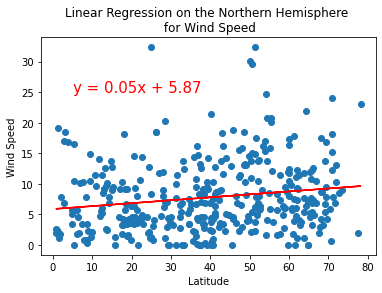

The r-value is: 0.165


In [92]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(5,25))


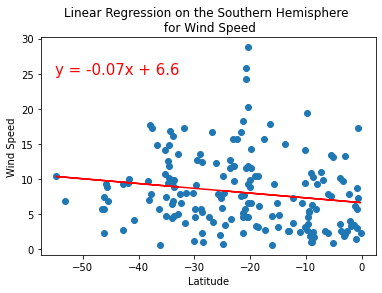

The r-value is: -0.170


In [95]:
# Linear regression on the Southern Hemisphere for wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,25))


In [1]:
#pip install gmaps